In [64]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR10_incremental_class/NormalNN_1-precision_record.pt
Avg_acc: tensor([98.6000, 50.0000, 33.3333, 25.0000, 20.0000, 16.6667, 14.2857, 12.5000,
        11.1111])
Task Avg_acc: tensor([ 10.9556,  12.5000,  14.2857,  16.6667,  20.0000,  25.0000,  33.3333,
         50.0000, 100.0000])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR10_incremental_class/NormalNN_2-precision_record.pt
Avg_acc: tensor([98.2500, 50.0000, 33.3333, 25.0000, 20.0000, 16.6667, 14.2857, 12.5000,
        11.1111])
Task Avg_acc: tensor([ 10.9167,  12.5000,  14.2857,  16.6667,  20.0000,  25.0000,  33.3333,
         50.0000, 100.0000])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR10_incremental_class/EWC_online_1-precision_record.pt

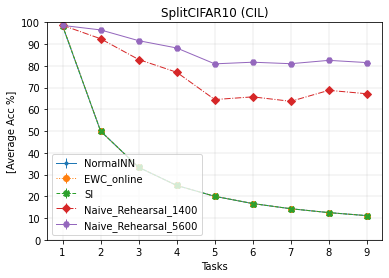

In [14]:
import torch
import pandas as pd
import numpy as np
# "Avg_NormalNN",
Markers = [".", "o", 
#            "v", "^", "s", 
           "X", "D", "H", 
#            "<", 
           ">", 
           "p", 
#            "P"
          ]
Lines_Styles = ["solid", "dotted", "dashed", "dashdot"]
REPEAT = 2

# SplitCIFAR10
Title = "SplitCIFAR10 (CIL)"
Y_Limit = 0
OutDirPath = "/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR10_incremental_class"

Approaches = ["NormalNN", 
#               "EWC",
              "EWC_online",
              "SI", 
#               "L2", 
              "Naive_Rehearsal_1400", 
              "Naive_Rehearsal_5600",
#               "MAS", 
#               "GEM_1100", "GEM_4400"
              ]


# SplitCIFAR10
# Title = "SplitCIFAR10 (TIL)"
# Y_Limit = 50
# REPEAT = 1
# OutDirPath = "/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR100_incremental_task"

# Approaches = ["NormalNN", 
#               "EWC",
#               "EWC_online",
#               "SI", 
#               "L2", 
#               "Naive_Rehearsal_1400", 
# #               "Naive_Rehearsal_5600",
# #               "MAS", 
# #               "GEM_1100", "GEM_4400"
#               ]


# SplitMNIST
# Title = "SplitMNIST (CIL)"
# Y_Limit = 0
# OutDirPath = "/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_class/"



# Title = "SplitMNIST (TIL)"
# Y_Limit = 90
# OutDirPath = "/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task/"


# Title = "SplitMNIST (DIL)"
# Y_Limit = 50
# OutDirPath = "/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_domain/"


# Approaches = ["NormalNN", 
# #               "EWC",
#               "EWC_online",
#               "SI", 
# #               "L2", 
#               "Naive_Rehearsal_1100", 
#               "Naive_Rehearsal_4400",
#               "MAS", "GEM_1100", "GEM_4400"
#               ]

# # PermMNIST
# Y_Limit = 90
# Title = "PermMNIST (DIL)"
# OutDirPath = "/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/permuted_MNIST_incremental_domain_10/"

# Y_Limit = 0
# Title = "PermMNIST (CIL)"
# OutDirPath = "/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/permuted_MNIST_incremental_class/"


# Approaches = ["NormalNN", 
#               "EWC",
#               "EWC_online",
#               "SI", "L2", 
#               "Naive_Rehearsal_4000", 
#               "Naive_Rehearsal_16000",
#               "MAS", 
#               "GEM_4000", "GEM_16000"
#               ]

# OutDirPath = "/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/permuted_MNIST_incremental_domain_10"

def get_avg_acc(acc_dict, num_tasks):


    acc_matrix = to_tensor(acc_dict, num_tasks)
    avg_acc = torch.zeros(num_tasks)
    task_avg_acc = torch.zeros(num_tasks)
    # Average Acc
    for col_index in range(0, num_tasks):
        avg_acc[col_index] = torch.sum(acc_matrix[:, col_index]) / (col_index + 1)
        task_avg_acc[col_index] = torch.sum(acc_matrix[col_index:(col_index + 1), col_index:]) / (num_tasks - col_index)
    print("Avg_acc:", avg_acc)
    print("Task Avg_acc:", task_avg_acc)


    return avg_acc, task_avg_acc


def to_tensor(acc_dict, num_tasks):
    # num_tasks = len(acc_dict.keys())
    acc_matrix = torch.zeros(size=(num_tasks, num_tasks))
    for row_key in acc_dict.keys():
        for col_key in acc_dict[row_key].keys():
            acc_matrix[int(row_key) - 1][int(col_key) - 1] = acc_dict[row_key][col_key]

    return acc_matrix


import matplotlib.pyplot as plt

if __name__ == '__main__':

    
    fig, ax = plt.subplots()
#     ax.errorbar(x=np.arange(0, 10), y=avg_acc_pd.mean(),  yerr = avg_acc_pd.std(), label="cosine")
# ax.errorbar(x=np.arange(0, 10), y=avg_acc_pd.mean(),  yerr = avg_acc_pd.std(), label="cosine")
# plt.gca().legend(('y0','y1'))

    for _ in range(0, len(Approaches)):
        approach = Approaches[_]
#         markers = Markers[_]
        avg_acc_lst = []
        task_avg_acc_lst = []
        line_style = Lines_Styles[_ % len(Lines_Styles)]
        markers = Markers[_ % len(Markers)]
        for exp_rep in range(1, REPEAT+1):
            acc_matrix_path = "{0}/{1}_{2}-precision_record.pt".format(OutDirPath, approach, exp_rep)
            print(acc_matrix_path)
            acc_dict = torch.load(acc_matrix_path)
            num_tasks = len(acc_dict.keys())
            avg_acc, task_avg_acc = get_avg_acc(acc_dict, num_tasks)
            avg_acc_lst.append(avg_acc.numpy())
            task_avg_acc_lst.append(task_avg_acc.numpy())
        avg_acc_pd = pd.DataFrame(avg_acc_lst, columns=list(range(1, num_tasks + 1)))
        avg_acc_pd.to_csv("{0}/_PD_{1}.csv".format(OutDirPath, approach), index=False)
        ax.errorbar(x=np.arange(1, len(avg_acc_pd.columns)+1), 
                    y=avg_acc_pd.mean(),  yerr = avg_acc_pd.std(), 
                    marker=markers, label=approach, linewidth=1, linestyle=line_style)
        plt.xticks(np.arange(1, len(avg_acc_pd.columns)+1))
        plt.yticks(np.arange(0, 11) * 10)
        plt.ylabel("[Average Acc %]")
        plt.xlabel("Tasks")
        ax.set_title(Title)
        plt.ylim([Y_Limit, 100])
        plt.grid(linestyle='-', linewidth=0.25)#color='red',
        plt.legend(Approaches, loc="lower left")#, ncol=2)
#         plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5)) #Legend outside 
        fig.savefig("{0}/_{1}.png".format(OutDirPath, Title), dpi=300)
#     print(avg_acc_pd)
    # for key in acc_dict.keys():
    #     print("K:", key)
    # print(acc_dict)
    # print(acc_dict["1"])

    # print("Avg Acc:", torch.mean(acc_matrix, dim=0))
    # print("Task Avg:", torch.mean(acc_matrix, dim=1))
    # print(acc_matrix)
    # acc_matrix_zeros = torch.zeros(size=(10, 10))
    # acc_matrix_ones = torch.ones(size=(10, 10))
    # acc_matrix_zeros[0][0] = 100

    # avg = acc_matrix_zeros + acc_matrix_ones
    # print(avg/2)


/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR100_incremental_task/NormalNN_1-precision_record.pt
Avg_acc: tensor([98.1000, 81.2250, 78.1333, 66.0125, 71.9200])
Task Avg_acc: tensor([72.8100, 69.7250, 70.5333, 83.3500, 97.3500])


/home/hikmat/anaconda3/envs/PY3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR100_incremental_task/EWC_1-precision_record.pt
Avg_acc: tensor([99.2500, 82.0750, 80.3000, 67.3375, 74.3400])
Task Avg_acc: tensor([74.4100, 72.1625, 71.9833, 85.2000, 98.3000])


/home/hikmat/anaconda3/envs/PY3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR100_incremental_task/EWC_online_1-precision_record.pt
Avg_acc: tensor([98.9500, 86.1250, 80.4000, 81.7875, 82.2900])
Task Avg_acc: tensor([76.7600, 76.1000, 92.2833, 96.2500, 93.4500])


/home/hikmat/anaconda3/envs/PY3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR100_incremental_task/SI_1-precision_record.pt
Avg_acc: tensor([99.2500, 87.3500, 85.2667, 85.7125, 85.1700])
Task Avg_acc: tensor([89.3500, 77.6500, 86.1167, 94.0250, 94.7000])


/home/hikmat/anaconda3/envs/PY3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR100_incremental_task/L2_1-precision_record.pt
Avg_acc: tensor([98.8500, 79.2250, 75.1833, 72.9875, 72.4100])
Task Avg_acc: tensor([95.2400, 62.7625, 63.4667, 68.3250, 82.5500])


/home/hikmat/anaconda3/envs/PY3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/CIFAR10/Continual-Learning-Benchmark/scripts/outputs/split_CIFAR100_incremental_task/Naive_Rehearsal_1400_1-precision_record.pt
Avg_acc: tensor([99.0500, 95.6000, 94.8500, 94.7625, 94.8800])
Task Avg_acc: tensor([97.8600, 90.4250, 94.1500, 98.1000, 98.6000])


/home/hikmat/anaconda3/envs/PY3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


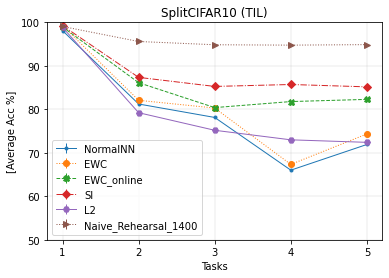

/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//NormalNN_1-precision_record.pt
Avg_acc: tensor([99.9527, 99.6108, 98.7377, 99.0969, 98.7856])
Task Avg_acc: tensor([99.1300, 98.0534, 99.7332, 99.5972, 99.4453])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//NormalNN_2-precision_record.pt
Avg_acc: tensor([99.9527, 99.4655, 98.7436, 98.6473, 98.2760])
Task Avg_acc: tensor([99.9054, 96.4740, 99.3597, 99.2951, 98.9914])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//NormalNN_3-precision_record.pt
Avg_acc: tensor([99.9054, 99.8058, 99.3933, 99.0686, 97.0995])
Task Avg_acc: tensor([99.7352, 96.5353, 99.6443, 98.2880, 99.1427])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Conti

/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//L2_1-precision_record.pt
Avg_acc: tensor([99.9527, 99.5609, 98.7339, 98.9537, 98.8255])
Task Avg_acc: tensor([99.9054, 97.4167, 99.7332, 99.3454, 98.1341])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//L2_2-precision_record.pt
Avg_acc: tensor([99.9054, 99.2908, 99.1030, 98.6335, 96.1907])
Task Avg_acc: tensor([99.9338, 94.7968, 99.0039, 98.5146, 98.3863])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//L2_3-precision_record.pt
Avg_acc: tensor([99.9054, 99.4622, 99.0954, 99.1517, 98.7816])
Task Avg_acc: tensor([99.9244, 98.2248, 99.1284, 99.0937, 98.5376])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benc

/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//MAS_1-precision_record.pt
Avg_acc: tensor([99.9054, 99.6344, 99.5650, 99.4911, 99.2253])
Task Avg_acc: tensor([99.8960, 99.0451, 99.2707, 99.6475, 99.1931])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//MAS_2-precision_record.pt
Avg_acc: tensor([99.8109, 99.5154, 99.3629, 98.7121, 98.5719])
Task Avg_acc: tensor([99.7069, 97.3066, 99.7154, 99.6979, 98.3359])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-Benchmark/scripts/outputs/split_MNIST_incremental_task//MAS_3-precision_record.pt
Avg_acc: tensor([99.9054, 99.7079, 99.7385, 99.6761, 99.3683])
Task Avg_acc: tensor([99.9149, 99.3022, 99.8221, 99.4965, 98.8401])
/home/hikmat/Desktop/JWorkspace/CL/Continuum/ContinuumBenchmarks/MNIST/Continual-Learning-B

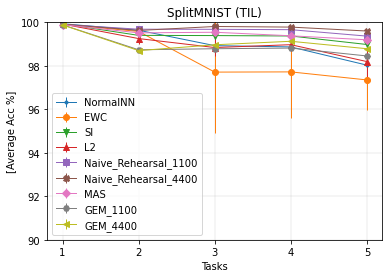

In [167]:
len(avg_acc_pd.columns)

9

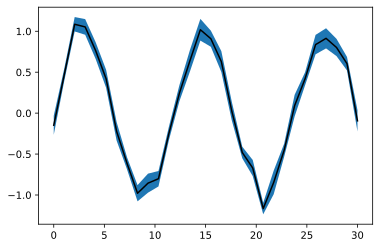

In [66]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 30, 30)
y = np.sin(x/6*np.pi)
error = np.random.normal(0.1, 0.02, size=y.shape)
y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error)
plt.show()



In [49]:
avg_acc_pd.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [50]:
avg_acc_pd


,1,2,3,4,5,6,7,8,9,10
0,97.440002,97.130005,96.693329,96.167503,95.066002,94.383339,93.828568,92.996246,93.108887,92.188004
1,97.459999,97.020004,96.860008,96.375000,95.510002,95.136665,93.927139,92.476250,90.773331,89.584000
2,97.510002,97.014999,96.670006,95.757500,95.251999,95.133339,93.754288,93.736252,93.485558,92.455994
3,97.470001,97.114998,97.013336,96.660004,95.904007,95.394997,94.192856,93.192497,92.714447,92.020996
4,97.570000,97.144997,96.793335,96.445007,95.639999,95.055000,94.568581,93.934998,93.072220,91.823997
5,97.540001,97.190002,96.910004,96.525002,95.742004,94.906670,94.342857,93.091248,91.105560,90.903000
6,97.580002,97.180000,96.493340,96.402504,95.790001,94.654999,94.165718,93.302498,92.988884,91.556007
7,97.480003,97.160004,96.873329,96.257500,94.491997,94.701668,93.727135,93.103752,91.862221,90.949997
8,97.550003,97.059998,96.956665,96.442497,96.029999,95.493340,94.675713,93.664993,92.963341,92.435005
9,97.349998,97.044998,96.739998,96.645004,96.203995,95.755005,95.068565,94.602493,93.321114,92.779999


ValueError: 'x' and 'y' must have the same size

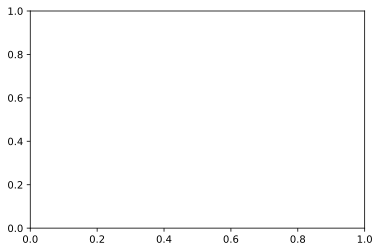

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(x=np.arange(0, 10), y=avg_acc_pd.mean(),  yerr = avg_acc_pd.std(), label="cosine")
ax.errorbar(x=np.arange(0, 10), y=avg_acc_pd.mean(),  yerr = avg_acc_pd.std(), label="cosine")
plt.gca().legend(('y0','y1'))

In [70]:
plt.show()

In [44]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:ylabel='passengers'>

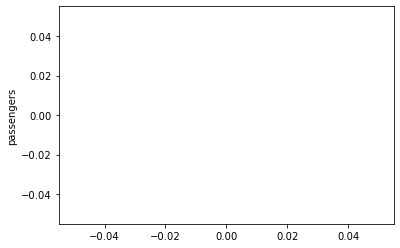

In [48]:
sns.lineplot(data=flights, x="year", y="passengers")

In [52]:
sns.lineplot('Day', 'x', ci=95, color="red",
             err_style='bars', data=df)

NameError: name 'df' is not defined